<a href="https://colab.research.google.com/github/abdalrahmenyousifMohamed/ML/blob/main/clustring2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup
First , let's import a few common modules , ensure Matplotlib plots figure inline and prepared function to save the figures . We also check that python 3.5 or later

In [3]:
# Python ≥ 3.5 is required
import sys
assert sys.version_info >= (3,5)

import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# to plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes' , labelsize=14)
mpl.rc('xtick' , labelsize=12)
mpl.rc('ytick' , labelsize=12)

# where to save the figures
PROJECT_ROOT_DIR = '.'
CHAPTER_ID = "unsupervised_learning"
IMAGE_PATH = os.path.join(PROJECT_ROOT_DIR , 'images' , CHAPTER_ID)
os.makedirs(IMAGE_PATH , exist_ok=True)

def save_fig(fig_id , tight_layout=True , fig_extension="png" , resolution=30):
  path = os.path.join(IMAGE_PATH,fig_id+"."+ fig_extension)
  print("Saving figure " , fig_id)
  if tight_layout:
    plt.tight_layout()
  plt.savefig(path , format=fig_extension , dpi = resolution)



# Clustering

**introduction - Classification vs Clustering**

In [4]:
from sklearn.datasets import load_iris

In [5]:
data = load_iris()
X = data.data
y = data.target
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [32]:
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [27]:
X[y==0]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [28]:
X[y==0,2]

array([1.4, 1.4, 1.3, 1.5, 1.4, 1.7, 1.4, 1.5, 1.4, 1.5, 1.5, 1.6, 1.4,
       1.1, 1.2, 1.5, 1.3, 1.4, 1.7, 1.5, 1.7, 1.5, 1. , 1.7, 1.9, 1.6,
       1.6, 1.5, 1.4, 1.6, 1.6, 1.5, 1.5, 1.4, 1.5, 1.2, 1.3, 1.4, 1.3,
       1.5, 1.3, 1.3, 1.3, 1.6, 1.9, 1.4, 1.6, 1.4, 1.5, 1.4])

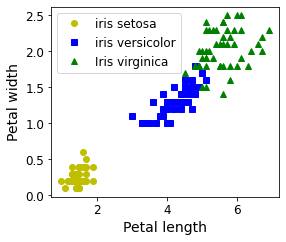

Saving figure  classification_vs_clustering_plot


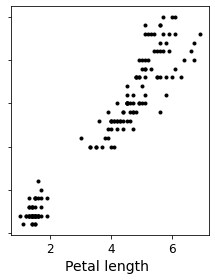

In [31]:
plt.figure(figsize=(9,3.5))

plt.subplot(121)
plt.plot(X[y == 0,2] , X[y==0,3] , 'yo' , label="iris setosa")
plt.plot(X[y==1,2] , X[y==1,3] , 'bs' , label = "iris versicolor")
plt.plot(X[y==2,2] , X[y==2,3] , "g^" , label="Iris virginica")
plt.xlabel("Petal length" , fontsize=14)
plt.ylabel("Petal width" , fontsize=14)
plt.legend(fontsize=12)
plt.show()
plt.subplot(121)
plt.scatter(X[:,2] , X[:,3] , c='k' , marker='.')
plt.xlabel("Petal length " , fontsize=14)
plt.tick_params(labelleft=False)
save_fig("classification_vs_clustering_plot")
plt.show()

Gaussian mixture model can actually separate these clusters pretty well (using all 4 features : petal length & width , and sepal length & width)

In [ ]:
X

In [33]:
from sklearn.mixture import GaussianMixture


In [51]:
y_pred = GaussianMixture(n_components=3 , random_state=42).fit(X).predict(X)

then we map each cluster to a class , instead of hard coding  the mapping  , we will pick the most common class for each cluster (using the scipy.stats.model() function :

In [59]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [54]:
from scipy import stats

mapping = {}
for class_id in np.unique(y):
  mode , _ = stats.mode(y_pred[y==class_id])
  mapping[mode[0]] = class_id

mapping

0
[1]
1
[2]
2
[0]


{1: 0, 2: 1, 0: 2}

In [63]:
y_pred = np.array([mapping[cluster_id] for cluster_id in y_pred])

In [64]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

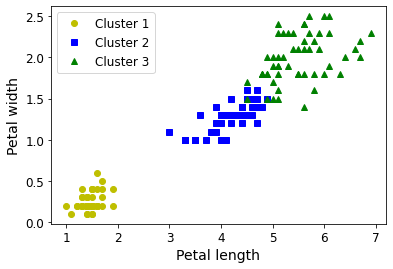

In [65]:
plt.plot(X[y_pred==0,2] ,X[y_pred==0,3] , 'yo' , label='Cluster 1' )
plt.plot(X[y_pred==1,2] , X[y_pred==1,3] , 'bs' , label = 'Cluster 2')
plt.plot(X[y_pred==2,2] , X[y_pred==2,3] , 'g^' , label='Cluster 3')
plt.xlabel('Petal length' , fontsize=14)
plt.ylabel('Petal width' , fontsize=14)
plt.legend(loc="upper left" , fontsize=12)
plt.show()

In [66]:
np.sum(y_pred == y)

145

In [67]:
np.sum(y_pred == y) / len(y_pred)

0.9666666666666667

Note : - the result in this notebook may differ slightly from  the book , This is because algorithms can sometimes be tweaked a bit between Scikit-Learn version

k-Means
Let's satrt by generating some blobs:

In [69]:
from sklearn.datasets import make_blobs

In [92]:
blob_centers = np.array(
    [
        [0.2,2.3],
     [-1.5,2.3],
     [-2.8 , 1.8],
     [-2.8 , 2.8],
     [-2.8 , 1.3]

    ]
)
blob_std = np.array([0.4,0.3,0.1,0.1,0.1])

In [93]:
X , y = make_blobs(n_samples=2000,centers=blob_centers , cluster_std=blob_std, random_state=7)

3.1990380211230796

In [95]:
def plot_clusters(X,y=None):
  plt.scatter(X[:,0] , X[:,1] , c=y ,s=1 )
  plt.xlabel("$x_1" , fontsize=14)
  plt.ylabel("$x_2$" , fontsize=14,rotation=0)

Saving figure  blobs_plot


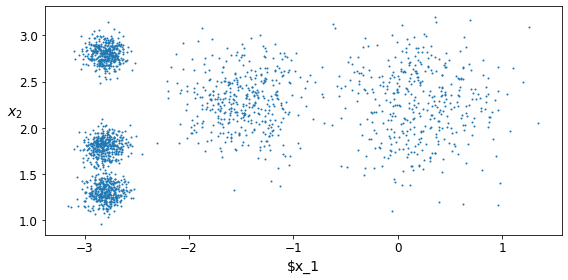

In [96]:
plt.figure(figsize=(8,4))
plot_clusters(X)
save_fig("blobs_plot")
plt.show()

# Fit and predict

Let's train a K-Means clusterer on this data set it will try to find eache blob's center and assign eache instance to the closest blob:

In [97]:
from sklearn.cluster import KMeans

In [98]:
k = 5
kmeans = KMeans(n_clusters=k , random_state=42)
y_pred = kmeans.fit_predict(X)

Each instance was assigned to one of the clusters:

In [99]:
y_pred

array([4, 0, 1, ..., 2, 1, 0], dtype=int32)

In [101]:
y_pred in kmeans.labels_

True

And the following 5 centroids (i.e cluster centers) were estimated

In [102]:
kmeans.cluster_centers_

array([[-2.80389616,  1.80117999],
       [ 0.20876306,  2.25551336],
       [-2.79290307,  2.79641063],
       [-1.46679593,  2.28585348],
       [-2.80037642,  1.30082566]])

Note that the KMeans instance preserves the labels of the instance it was trained on , Somewhat confusingly , in this context , the label of an instance is the index of the cluster that instance gets assigned to : 

In [103]:
kmeans.labels_

array([4, 0, 1, ..., 2, 1, 0], dtype=int32)

of course we can predict the labels of new instances

In [108]:
X_new = np.array([[0,3],[0,2],[-2,3],[-1,2.5]])
kmeans.predict(X_new)

array([1, 1, 2, 3], dtype=int32)

In [113]:
np.linspace?

# Decision Boundaries

Let's plot the model's decision boundaries. This gives us Voronoi diagram :
def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,


In [119]:
def plot_data(X):
  plt.plot(X[:,0] , X[:,1] , 'k.' , markersize=2)

def plot_centroids(centroids , weights=None , circle_color='w' , cross_color='k'):
  if weights is not None:
    centroids = centroids[weights > weights.max() / 10]
  plt.scatter(centroids[:,0] , centroids[:,1] , marker='o' , s=35 , linewidths=8,color=circle_color , zorder=10 , alpha=0.9)
  plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

In [121]:
kmeans

KMeans(n_clusters=5, random_state=42)

Saving figure  voronoi_plot


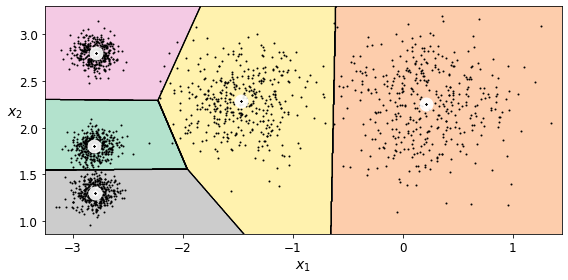

In [120]:
plt.figure(figsize=(8,4))
plot_decision_boundaries(kmeans,X)
save_fig('voronoi_plot')
plt.show()

not bad ! some of the instance near the edges were probably assigned to the wrong cluster , but overall it looks pretty good

# Hard Clustering vs soft
Rather than arbitrarily choosing  cluster for each instance , which is called hard clustring , it might be better measure the distance of eache instance to all 5 centroids. This is what the tranform() method does:

In [122]:
kmeans.transform(X_new)

array([[3.04942668, 0.77320267, 2.80031359, 1.63140907, 3.27556126],
       [2.81093633, 0.32995317, 2.9042344 , 1.49439034, 2.88633901],
       [1.44340516, 2.33085705, 0.81862318, 0.89124174, 1.87824276],
       [1.93452598, 1.23324038, 1.81723985, 0.51357294, 2.16318616]])

You can verify that this is indeed the Euclidian distance between each instance and each centroid:



In [123]:
np.linalg.norm(np.tile(X_new, (1, k)).reshape(-1, k, 2) - kmeans.cluster_centers_, axis=2)

array([[3.04942668, 0.77320267, 2.80031359, 1.63140907, 3.27556126],
       [2.81093633, 0.32995317, 2.9042344 , 1.49439034, 2.88633901],
       [1.44340516, 2.33085705, 0.81862318, 0.89124174, 1.87824276],
       [1.93452598, 1.23324038, 1.81723985, 0.51357294, 2.16318616]])

The KMeans class applies an optimized algorithm by default. To get the original K-Means algorithm (for educational purposes only), you must set init="random", n_init=1and algorithm="full". These hyperparameters will be explained below.



In [124]:
kmeans_iter1  = KMeans(n_clusters=5 , init='random' , n_init=1, algorithm="full" , max_iter=1 , random_state=0)
kmeans_iter3  = KMeans(n_clusters=5 , init='random' , n_init=1, algorithm="full" , max_iter=3 , random_state=0)
kmeans_iter2  = KMeans(n_clusters=5 , init='random' , n_init=1, algorithm="full" , max_iter=2 , random_state=0)

In [125]:
kmeans_iter1.fit(X)
kmeans_iter3.fit(X)
kmeans_iter2.fit(X)

KMeans(algorithm='full', init='random', max_iter=2, n_clusters=5, n_init=1,
       random_state=0)

Text(0.5, 1.0, 'Update the centroids (initially randomly)')

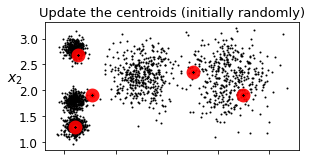

In [126]:
plt.figure(figsize=(10,8))

plt.subplot(321)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_ , circle_color='r')
plt.ylabel("$x_2$" , fontsize=14 , rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Update the centroids (initially randomly)" , fontsize=13)

Saving figure  kmeans_algorithm_plot


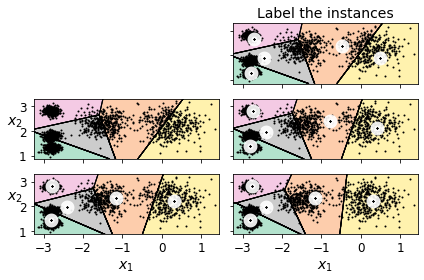

In [136]:
plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, X, show_xlabels=False, show_ylabels=False)
plt.title("Label the instances", fontsize=14)

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, X, show_centroids=False, show_xlabels=False)
#plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, X, show_xlabels=False, show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, X, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, X, show_ylabels=False)

#save_fig("kmeans_algorithm_plot")
plt.show()

However , one major problem with this approache  is that if you run K-Means mutliple times (or with diffierent random seeds) , it can converge to very different soultions , as you can see below

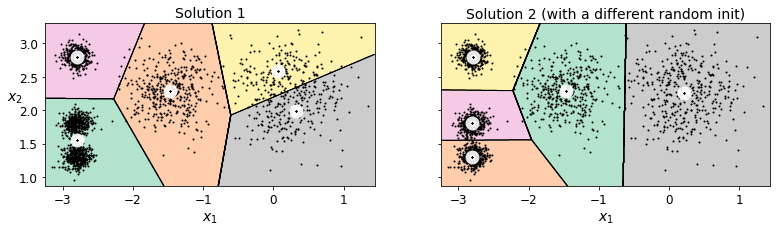

In [139]:
def plot_clusterer_comparison(clusterer1 , clusterer2 , X, title1=None , title2=None):
  clusterer1.fit(X)
  clusterer2.fit(X)

  plt.figure(figsize=(13,3))

  plt.subplot(121)
  plot_decision_boundaries(clusterer1,X)
  if title1:
    plt.title(title1,fontsize=14)
  plt.subplot(122)
  plot_decision_boundaries(clusterer2 , X , show_ylabels=False)
  if title2:
    plt.title(title2,fontsize=14)

kmeans_rnd_init1 = KMeans(n_clusters=5,init="random" , n_init=1
                          ,
                          algorithm="full",random_state=2
                          )

kmeans_rnd_init2 = KMeans(n_clusters=5,init="random",n_init=1 , algorithm="full",random_state=5)
plot_clusterer_comparison(kmeans_rnd_init1 , kmeans_rnd_init2 , X ,"Solution 1", "Solution 2 (with a different random init)")
plt.show()

# Inertia
To select the best model, we will need a way to evaluate a K-Mean model's performance. Unfortunately, clustering is an unsupervised task, so we do not have the targets. But at least we can measure the distance between each instance and its centroid. This is the idea behind the inertia metric:

In [140]:
kmeans.inertia_

211.5985372581684

In [141]:
kmeans.cluster_centers_

array([[-2.80389616,  1.80117999],
       [ 0.20876306,  2.25551336],
       [-2.79290307,  2.79641063],
       [-1.46679593,  2.28585348],
       [-2.80037642,  1.30082566]])

As you can easily verify , inertia is the sum of the squared distance between each training instance and its closest centroid

In [142]:
X_dist = kmeans.transform(X)
np.sum(X_dist[np.arange(len(X_dist)) , kmeans.labels_]**2)

211.59853725816868

The score() method returns the negative inertia. Why negative? Well, it is because a predictor's score() method must always respect the "greater is better" rule.



In [143]:
kmeans.score(X)

-211.59853725816836

In [146]:
kmeans_rnd_init1.inertia_

219.43539442771396

In [147]:
kmeans_rnd_init2.inertia_

211.5985372581684

As you can see, they have a higher inertia than the first "good" model we trained, which means they are probably worse.

When you set the n_init hyperparameter, Scikit-Learn runs the original algorithm n_init times, and selects the solution that minimizes the inertia. By default, Scikit-Learn sets n_init=10

In [148]:
kmeans_rnd_10_inits = KMeans(n_clusters=5, init="random", n_init=10,
                              algorithm="full", random_state=2)
kmeans_rnd_10_inits.fit(X)

KMeans(algorithm='full', init='random', n_clusters=5, random_state=2)

As you can see, we end up with the initial model, which is certainly the optimal K-Means solution (at least in terms of inertia, and assuming 

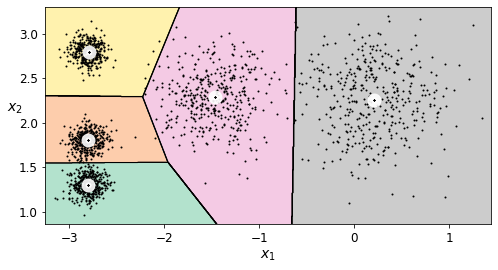

In [149]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans_rnd_10_inits, X)
plt.show()

# Accelerated K-Means

In [150]:
%timeit -n 50 KMeans(algorithm="elkan", random_state=42).fit(X)

99.3 ms ± 41.2 ms per loop (mean ± std. dev. of 7 runs, 50 loops each)


In [150]:
%timeit -n 50 KMeans(algorithm="full", random_state=42).fit(X)

Mini-Batch K-Means
Scikit-Learn also implements a variant of the K-Means algorithm that supports mini-batches 

In [151]:
from sklearn.cluster import MiniBatchKMeans

minibatch_kmeans = MiniBatchKMeans(n_clusters=5 , random_state=42)
minibatch_kmeans.fit(X)
minibatch_kmeans.inertia_

211.65239850433215

If the dataset does not fit in memory, the simplest option is to use the memmap class, just like we did for incremental PCA in the previous chapter. First let's load MNIST:



In [154]:
import urllib.request
from sklearn.datasets import fetch_openml

minst = fetch_openml('mnist_784' , version=1,as_frame=False)
minst.target = minst.target.astype(np.int64)

In [156]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    minst["data"], minst["target"], random_state=42)

next , let's write it to memmap

In [159]:
filename = "my_mnist.data"
X_mm = np.memmap(filename , dtype='float32' , mode='write' , shape=X_train.shape)
X_mm[:] = X_train
X_mm

memmap([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [160]:
minibatch_kmeans = MiniBatchKMeans(n_clusters=10, batch_size=10, random_state=42)
minibatch_kmeans.fit(X_mm)

MiniBatchKMeans(batch_size=10, n_clusters=10, random_state=42)

if your data is so large that you cannot use memmap , things get more complicated , let's start by writing a function to load the next batch (in real life , you would load the data from disk)

In [165]:
len(np.random.choice(len(X),100 , replace=False))

100

In [161]:
def load_next_batch(batch_size):
  return X[np.random.choice(len(X),batch_size , replace=False)]

Now we can train the model by feeding it one batch at a time. We also need to implement multiple initializations and keep the model with the lowest inertia:



In [162]:
np.random.seed(42)

In [168]:
k = 5
n_init=10
n_iterations =100
batch_size = 100
init_size = 500 # more data for k-means++ initilization
evaluate_on_last_iters = 10

best_kmeans = None

for init in range(n_init):
  minibatch_kmeans = MiniBatchKMeans(n_clusters=k , init_size=init_size)
  X_init = load_next_batch(init_size)
  minibatch_kmeans.partial_fit(X_init)
  minibatch_kmeans.sum_inertial_ = 0
  for iteration in range(n_iterations):
    X_batch = load_next_batch(batch_size)
    minibatch_kmeans.partial_fit(X_batch)
    if iteration >= n_iterations - evaluate_on_last_iters:
      minibatch_kmeans.inertia_ += minibatch_kmeans.inertia_
  if(best_kmeans is None or minibatch_kmeans.inertia_ <  best_kmeans.inertia_):
    best_kmeans = minibatch_kmeans



In [169]:
best_kmeans.score(X)

-211.6328847747678

=

minibatch kmeans is much faster than regular K-Means

In [170]:
%timeit KMeans(n_clusters=5, random_state=42).fit(X)

The slowest run took 4.70 times longer than the fastest. This could mean that an intermediate result is being cached.
106 ms ± 69.2 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [171]:
%timeit MiniBatchKMeans(n_clusters=5, random_state=42).fit(X)

124 ms ± 40.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [173]:
from timeit import timeit
times = np.empty((100, 2))
inertias = np.empty((100, 2))
for k in range(1, 101):
    kmeans_ = KMeans(n_clusters=k, random_state=42)
    minibatch_kmeans = MiniBatchKMeans(n_clusters=k, random_state=42)
    print("\r{}/{}".format(k, 100), end="")
    times[k-1, 0] = timeit("kmeans_.fit(X)", number=10, globals=globals())
    times[k-1, 1]  = timeit("minibatch_kmeans.fit(X)", number=10, globals=globals())
    inertias[k-1, 0] = kmeans_.inertia_
    inertias[k-1, 1] = minibatch_kmeans.inertia_

100/100

Saving figure  minibatch_kmeans_vs_kmeans


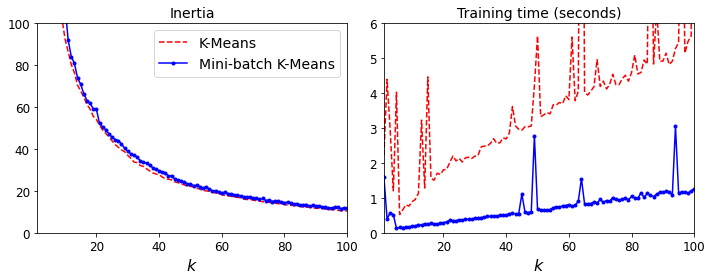

In [174]:
plt.figure(figsize=(10,4))

plt.subplot(121)
plt.plot(range(1, 101), inertias[:, 0], "r--", label="K-Means")
plt.plot(range(1, 101), inertias[:, 1], "b.-", label="Mini-batch K-Means")
plt.xlabel("$k$", fontsize=16)
plt.title("Inertia", fontsize=14)
plt.legend(fontsize=14)
plt.axis([1, 100, 0, 100])

plt.subplot(122)
plt.plot(range(1, 101), times[:, 0], "r--", label="K-Means")
plt.plot(range(1, 101), times[:, 1], "b.-", label="Mini-batch K-Means")
plt.xlabel("$k$", fontsize=16)
plt.title("Training time (seconds)", fontsize=14)
plt.axis([1, 100, 0, 6])

save_fig("minibatch_kmeans_vs_kmeans")
plt.show()

Saving figure  inertia_vs_k_plot


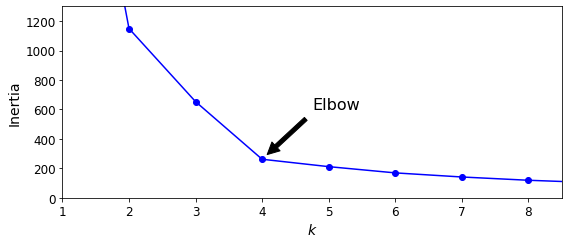

In [178]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(4, inertias[3]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.axis([1, 8.5, 0, 1300])
save_fig("inertia_vs_k_plot")
plt.show()

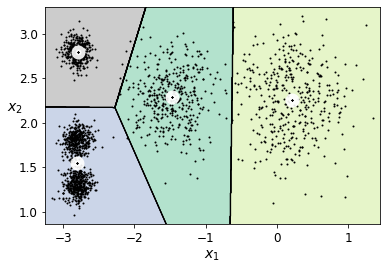

In [176]:
plot_decision_boundaries(kmeans_per_k[4-1], X)
plt.show()

0.655517642572828
Saving figure  silhouette_score_vs_k_plot


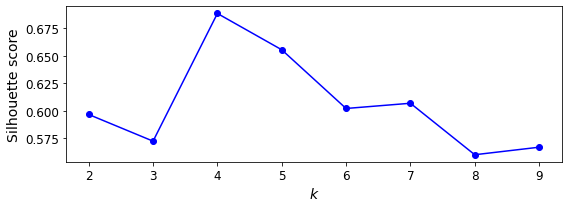

In [182]:
from sklearn.metrics import silhouette_score
print(silhouette_score(X, kmeans.labels_))

silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
#plt.axis([1.8, 8.5, 0.55, 0.7])
save_fig("silhouette_score_vs_k_plot")
plt.show()

Saving figure  silhouette_score_vs_k_plot


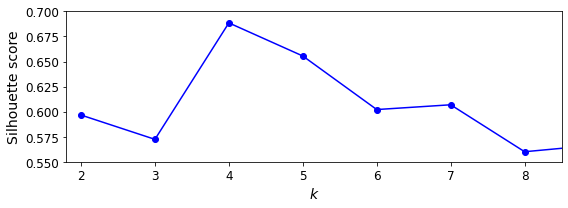

In [181]:
from sklearn.metrics import silhouette_score
silhouette_score(X, kmeans.labels_)

silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1.8, 8.5, 0.55, 0.7])
save_fig("silhouette_score_vs_k_plot")
plt.show()

Saving figure  silhouette_analysis_plot


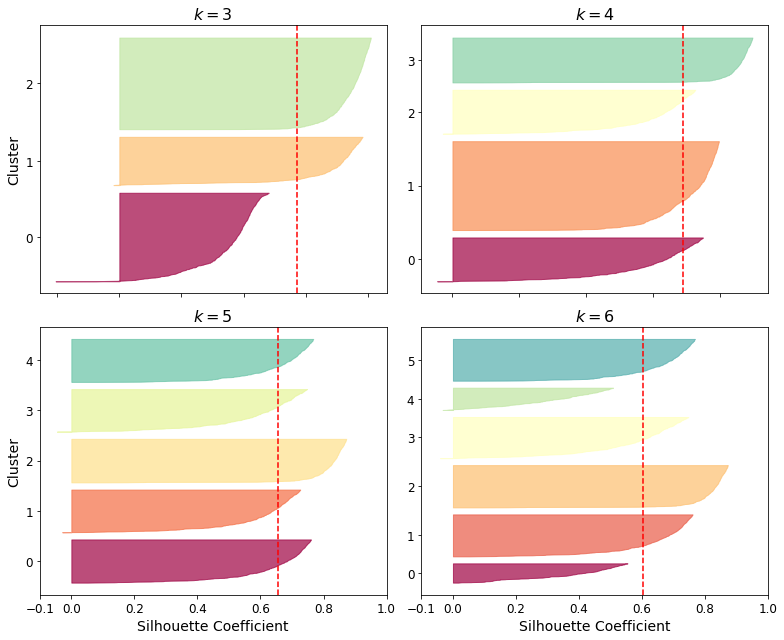

In [183]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

save_fig("silhouette_analysis_plot")
plt.show()